In [2]:
import pandas as pd#import the pandas module becuase our dataset is a csv file
import numpy as np #import the numpy module becuase our dataset is a csv file
import matplotlib.pyplot as plt#import the matplot library to plot the heatmap to see the correlation
import seaborn as sns#import the seaborn library to plot the heatmap to see the correlation
import sklearn

In [3]:
path = open("ThyroidDataset.csv")#here we are defining the path of our dataset file
dataframe = pd.read_csv(path)#here we are using the read_csv function to read the csv file from the path
dataframe #here we are rpinting the dataframe

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [4]:
dataframe.drop("referral source",axis=1,inplace=True)

In [5]:
dataframe.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,2.5,t,125,t,1.14,t,109,f,?,P
1,23,F,f,f,f,f,f,f,f,f,...,2,t,102,f,?,f,?,f,?,P
2,46,M,f,f,f,f,f,f,f,f,...,?,t,109,t,0.91,t,120,f,?,P
3,70,F,t,f,f,f,f,f,f,f,...,1.9,t,175,f,?,f,?,f,?,P
4,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,f,?,P


In [6]:
feature_cols = ["age",
                "sex",
                "on_thyroxine",
                "query_on_thyroxine",
                "on_antithyroid_medication",
                "sick",
                "pregnant",
                "thyroid_surgery",
                "I131_treatment",
                "query_hypothyroid",
                "query_hyperthyroid",
                "lithium",
                "goitre",
                "tumor",
                "hypopituitary",
                "psych",
                "TSH_measured",
                "TSH",
                "T3_measured",
                "T3",
                "TT4_measured",
                "TT4",
                "T4U_measured",
                "T4U",
                "FTI_measured",
                "FTI",
                "TBG_measured",
                "TBG",
               "binaryClass"]

In [7]:
dataframe.columns = feature_cols

In [8]:
dataframe.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,binaryClass
3767,30,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,f,?,P
3768,68,F,f,f,f,f,f,f,f,f,...,2.1,t,124,t,1.08,t,114,f,?,P
3769,74,F,f,f,f,f,f,f,f,f,...,1.8,t,112,t,1.07,t,105,f,?,P
3770,72,M,f,f,f,f,f,f,f,f,...,2,t,82,t,0.94,t,87,f,?,P
3771,64,F,f,f,f,f,f,f,f,f,...,2.2,t,99,t,1.07,t,92,f,?,P


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [10]:
dataframe.columns #here we are changing the name of the columns in the dataset
dataframe  #printing the dataset first 5 rows again to see the dataset

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,2.5,t,125,t,1.14,t,109,f,?,P
1,23,F,f,f,f,f,f,f,f,f,...,2,t,102,f,?,f,?,f,?,P
2,46,M,f,f,f,f,f,f,f,f,...,?,t,109,t,0.91,t,120,f,?,P
3,70,F,t,f,f,f,f,f,f,f,...,1.9,t,175,f,?,f,?,f,?,P
4,70,F,f,f,f,f,f,f,f,f,...,1.2,t,61,t,0.87,t,70,f,?,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,?,f,?,f,?,f,?,f,?,P
3768,68,F,f,f,f,f,f,f,f,f,...,2.1,t,124,t,1.08,t,114,f,?,P
3769,74,F,f,f,f,f,f,f,f,f,...,1.8,t,112,t,1.07,t,105,f,?,P
3770,72,M,f,f,f,f,f,f,f,f,...,2,t,82,t,0.94,t,87,f,?,P


In [11]:
target = dataframe.binaryClass #here we are storing our target into a target variable
create = target.str.split('([A-Za-z]+)', expand=True) #here we are trying to split the target into create
create = create[1] #here we took the 1st data of the create becuase it is in a string format
target = create.replace({None:'Z'}) #Z is no a type of thyroid disease
dataframe.binaryClass = target #storing the target into our target dataset column again

In [12]:
dataframe.binaryClass.unique()

array(['P', 'N'], dtype=object)

In [13]:
dataframe.binaryClass.value_counts()

binaryClass
P    3481
N     291
Name: count, dtype: int64

In [14]:
dataframe.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
binaryClass                  0
dtype: int64

In [15]:
dataframe = dataframe.replace(['?'],np.nan) #here we are replacing the ? values with the null so that we can do some processing

In [16]:
dataframe.isnull().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
binaryClass                     0
dtype: int64

In [17]:
dataframe.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'binaryClass'],
      dtype='object')

In [18]:
#here we can see the TBG has more null observations it will tremaenously occure problem so we can remove and some of the other 
#feature rows which is not useful
dataframe.drop(['TSH_measured','T3_measured'],axis=1,inplace=True) #these looks like some unnecessary columns so we are dropping them becuase they are not going to be used iin our processing

In [19]:
dataframe.drop('TT4_measured',axis=1,inplace=True) #these looks like some unnecessary columns so we are dropping them becuase they are not going to be used iin our processing
dataframe.drop('T4U_measured',axis=1,inplace=True)
dataframe.drop('FTI_measured',axis=1,inplace=True)
dataframe.drop('TBG_measured',axis=1,inplace=True)
dataframe.drop('TBG',axis=1,inplace=True)
#dataframe.drop('referral source',axis=1,inplace=True)
#dataframe.drop('hypopituitary',axis = 1,inplace=True)

In [20]:
dataframe.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
binaryClass                    0
dtype: int64

In [21]:
dataframe

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.3,2.5,125,1.14,109,P
1,23,F,f,f,f,f,f,f,f,f,...,f,f,f,f,4.1,2,102,NaN,NaN,P
2,46,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.98,NaN,109,0.91,120,P
3,70,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.16,1.9,175,NaN,NaN,P
4,70,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.72,1.2,61,0.87,70,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,t,f,f,NaN,NaN,NaN,NaN,NaN,P
3768,68,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1,2.1,124,1.08,114,P
3769,74,F,f,f,f,f,f,f,f,f,...,f,f,f,f,5.1,1.8,112,1.07,105,P
3770,72,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.7,2,82,0.94,87,P


In [22]:
dataframe.sex.replace({'F':2,'M':1},inplace=True) #here we are labeling our male as 1 and female as 2
dataframe['on_thyroxine'].replace({'t':1,'f':0},inplace=True)
dataframe['query_on_thyroxine'].replace({'t':0,'f':1},inplace=True)
dataframe['on_antithyroid_medication'].replace({'t':1,'f':0},inplace=True)
dataframe.sick.replace({'t':1,'f':0},inplace=True)
dataframe.pregnant.replace({'t':1,'f':0},inplace=True)
dataframe['thyroid_surgery'].replace({'t':1,'f':0},inplace=True)
dataframe['I131_treatment'].replace({'t':1,'f':0},inplace=True)
dataframe['query_hypothyroid'].replace({'t':1,'f':0},inplace=True)
dataframe['query_hyperthyroid'].replace({'t':1,'f':0},inplace=True)
dataframe.lithium.replace({'t':1,'f':0},inplace=True)
dataframe.goitre.replace({'t':1,'f':0},inplace=True)
dataframe.tumor.replace({'t':1,'f':0},inplace=True)
dataframe.hypopituitary.replace({'t':1,'f':0},inplace=True)
dataframe.psych.replace({'t':1,'f':0},inplace=True)

In [23]:
dataframe['on_antithyroid_medication'].value_counts()

on_antithyroid_medication
0    3729
1      43
Name: count, dtype: int64

In [24]:
round_values = round(dataframe.sex.mean())
dataframe.sex.fillna(round_values,inplace=True)

In [25]:
dataframe.sex.unique()

array([2., 1.])

In [26]:
dataframe.isnull().sum()

age                            1
sex                            0
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
binaryClass                    0
dtype: int64

In [27]:
from sklearn.impute import KNNImputer #importing the KNNInputer function from the sklearn.impute to fill the null values
knnimp = KNNImputer(n_neighbors=3) #making an instance of the KNN Inputer with neighbors=3
 

In [28]:
cols = ['TSH','T3','TT4','T4U','FTI'] #strogin the empty columns into the cols variables
for i in cols:
    dataframe[i] = knnimp.fit_transform(dataframe[[i]]) #here we are using the fit_transform function to fit the dataframe and filling the null values of it

In [29]:
dataframe.isnull().sum()

age                          1
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
binaryClass                  0
dtype: int64

In [30]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3772 non-null   float64
 2   on_thyroxine               3772 non-null   int64  
 3   query_on_thyroxine         3772 non-null   int64  
 4   on_antithyroid_medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid_surgery            3772 non-null   int64  
 8   I131_treatment             3772 non-null   int64  
 9   query_hypothyroid          3772 non-null   int64  
 10  query_hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

In [31]:
df2 = dataframe.drop('binaryClass',axis=1) #making our x dataset by dropping our target column
y = dataframe.binaryClass #storing our target column into y column
 
df2

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
0,41,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1.300000,2.5000,125.000000,1.140,109.000000
1,23,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,4.100000,2.0000,102.000000,0.995,110.469649
2,46,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.980000,2.0135,109.000000,0.910,120.000000
3,70,2.0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0.160000,1.9000,175.000000,0.995,110.469649
4,70,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.720000,1.2000,61.000000,0.870,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,2.0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,5.086766,2.0135,108.319345,0.995,110.469649
3768,68,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1.000000,2.1000,124.000000,1.080,114.000000
3769,74,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,5.100000,1.8000,112.000000,1.070,105.000000
3770,72,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.700000,2.0000,82.000000,0.940,87.000000


In [32]:
#df2 = df2.drop('hypopituitary',axis = 1,inplace=True)

<Axes: >

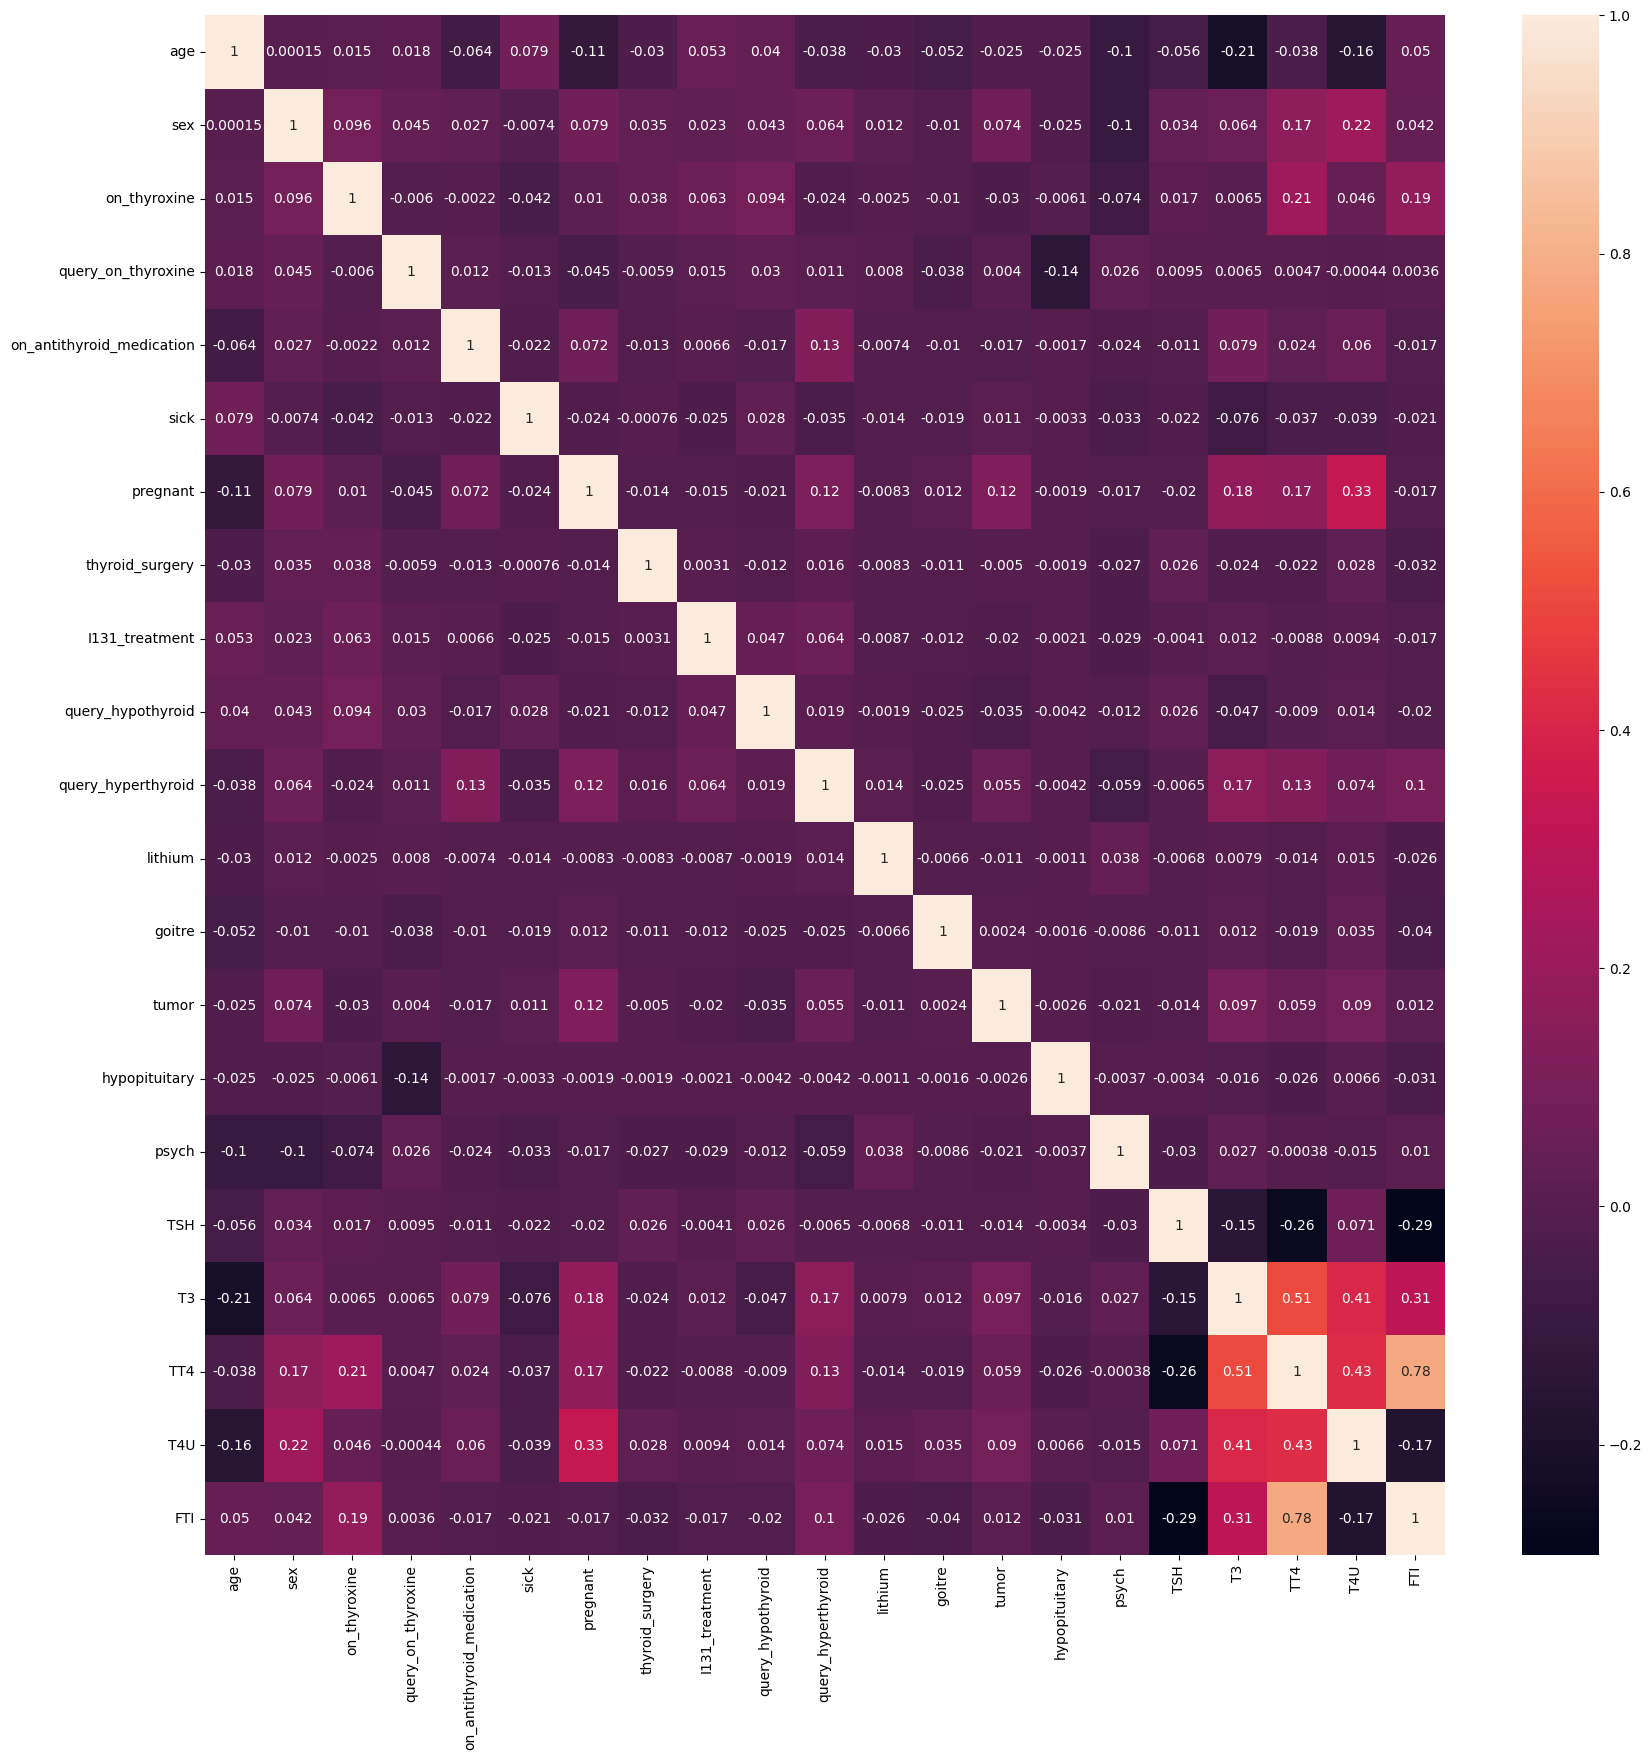

In [33]:
plt.figure(figsize=(20,20)) #plotting the heatmap of size 20 cross 20
sns.heatmap(df2.corr(),annot=True) #plotting the heatmap of correlation using the seaborn library

In [34]:
df2.corr()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
age,1.000000,0.000154,0.014577,0.017870,-0.063882,0.079468,-0.113521,-0.029502,0.053149,0.039562,...,-0.030126,-0.051830,-0.025037,-0.024927,-0.100116,-0.056167,-0.214938,-0.037610,-0.157542,0.050026
sex,0.000154,1.000000,0.095709,0.044712,0.027278,-0.007438,0.078665,0.034543,0.022612,0.042687,...,0.012138,-0.010417,0.073514,-0.024712,-0.099896,0.033615,0.064213,0.167546,0.221883,0.041900
on_thyroxine,0.014577,0.095709,1.000000,-0.005995,-0.002201,-0.042053,0.010152,0.037583,0.063373,0.094412,...,-0.002509,-0.010098,-0.029773,-0.006099,-0.073571,0.017138,0.006485,0.212801,0.046368,0.185748
query_on_thyroxine,0.017870,0.044712,-0.005995,1.000000,0.012446,-0.012594,-0.045247,-0.005858,0.014610,0.029808,...,0.008026,-0.038000,0.004011,-0.140500,0.026247,0.009453,0.006466,0.004702,-0.000438,0.003550
on_antithyroid_medication,-0.063882,0.027278,-0.002201,0.012446,1.000000,-0.021624,0.072050,-0.012819,0.006589,-0.017264,...,-0.007436,-0.010241,-0.017353,-0.001749,-0.024318,-0.010668,0.079212,0.023811,0.060365,-0.016603
sick,0.079468,-0.007438,-0.042053,-0.012594,-0.021624,1.000000,-0.024040,-0.000762,-0.025384,0.027718,...,-0.013944,-0.019205,0.010949,-0.003279,-0.032883,-0.022099,-0.076472,-0.037006,-0.039069,-0.021189
pregnant,-0.113521,0.078665,0.010152,-0.045247,0.072050,-0.024040,1.000000,-0.014251,-0.015048,-0.021364,...,-0.008266,0.012447,0.123728,-0.001944,-0.016577,-0.019693,0.181147,0.172490,0.334702,-0.016698
thyroid_surgery,-0.029502,0.034543,0.037583,-0.005858,-0.012819,-0.000762,-0.014251,1.000000,0.003104,-0.012026,...,-0.008266,-0.011385,-0.004990,-0.001944,-0.027034,0.026230,-0.024146,-0.021806,0.027922,-0.031828
I131_treatment,0.053149,0.022612,0.063373,0.014610,0.006589,-0.025384,-0.015048,0.003104,1.000000,0.047296,...,-0.008729,-0.012022,-0.020371,-0.002053,-0.028546,-0.004125,0.012057,-0.008848,0.009406,-0.016817
query_hypothyroid,0.039562,0.042687,0.094412,0.029808,-0.017264,0.027718,-0.021364,-0.012026,0.047296,1.000000,...,-0.001860,-0.024527,-0.034582,-0.004188,-0.012320,0.025978,-0.047496,-0.009013,0.013832,-0.019719


In [35]:
#df2.hypopituitary.value_counts

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
cols = dataframe.select_dtypes(include=['object'])

In [38]:
for i in cols.columns:
    try:
        dataframe[i] = le.fit_transform(dataframe[[i]])
    except:
        continue

C:\Users\shelk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shelk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
#now we can see their is correlation in some features
for a in range(len(dataframe.corr())):
    for b in range(a):
        if((dataframe.corr().iloc[a,b])>=0.7):
            print(dataframe.corr().columns[b])

TT4


In [40]:
df4 = dataframe[['TT4']]

array([[<Axes: title={'center': 'TT4'}>]], dtype=object)

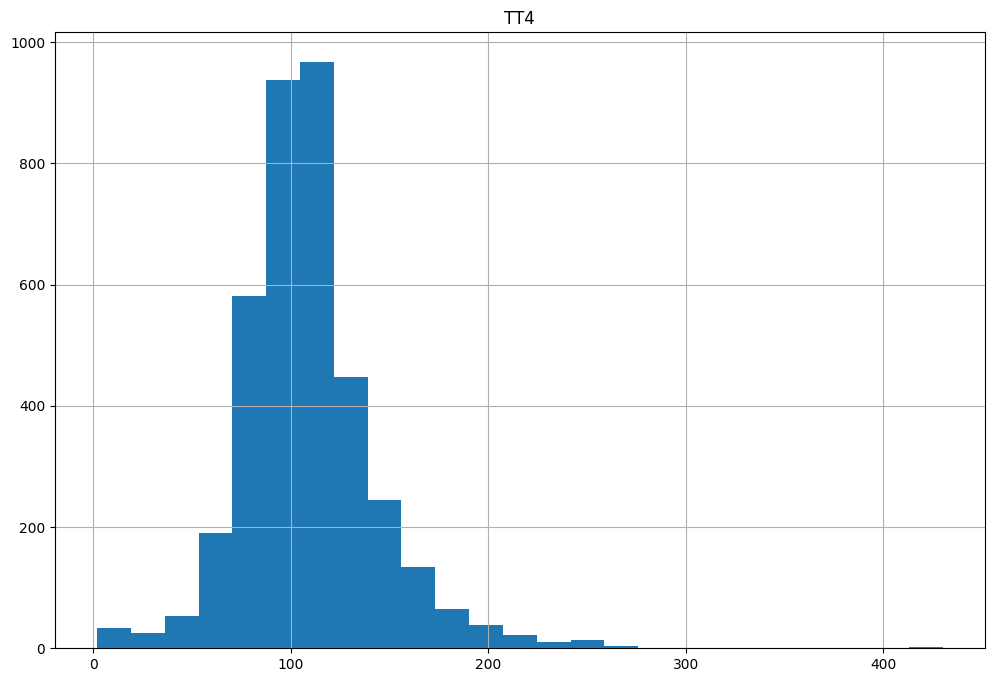

In [41]:
df4.hist(bins = 25,figsize = (12,8))

In [42]:
#so TT4 has high correlation among all we can remove
dataframe.drop('TT4',axis=1,inplace=True)
#dataframe.drop('TSH',axis=1,inplace=True)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'on_thyroxine'}>,
        <Axes: title={'center': 'query_on_thyroxine'}>,
        <Axes: title={'center': 'on_antithyroid_medication'}>],
       [<Axes: title={'center': 'sick'}>,
        <Axes: title={'center': 'pregnant'}>,
        <Axes: title={'center': 'thyroid_surgery'}>,
        <Axes: title={'center': 'I131_treatment'}>,
        <Axes: title={'center': 'query_hypothyroid'}>],
       [<Axes: title={'center': 'query_hyperthyroid'}>,
        <Axes: title={'center': 'lithium'}>,
        <Axes: title={'center': 'goitre'}>,
        <Axes: title={'center': 'tumor'}>,
        <Axes: title={'center': 'hypopituitary'}>],
       [<Axes: title={'center': 'psych'}>,
        <Axes: title={'center': 'TSH'}>, <Axes: title={'center': 'T3'}>,
        <Axes: title={'center': 'T4U'}>, <Axes: title={'center': 'FTI'}>],
       [<Axes: title={'center': 'binaryClass'}>, <Axes: >, <Axes: >,
       

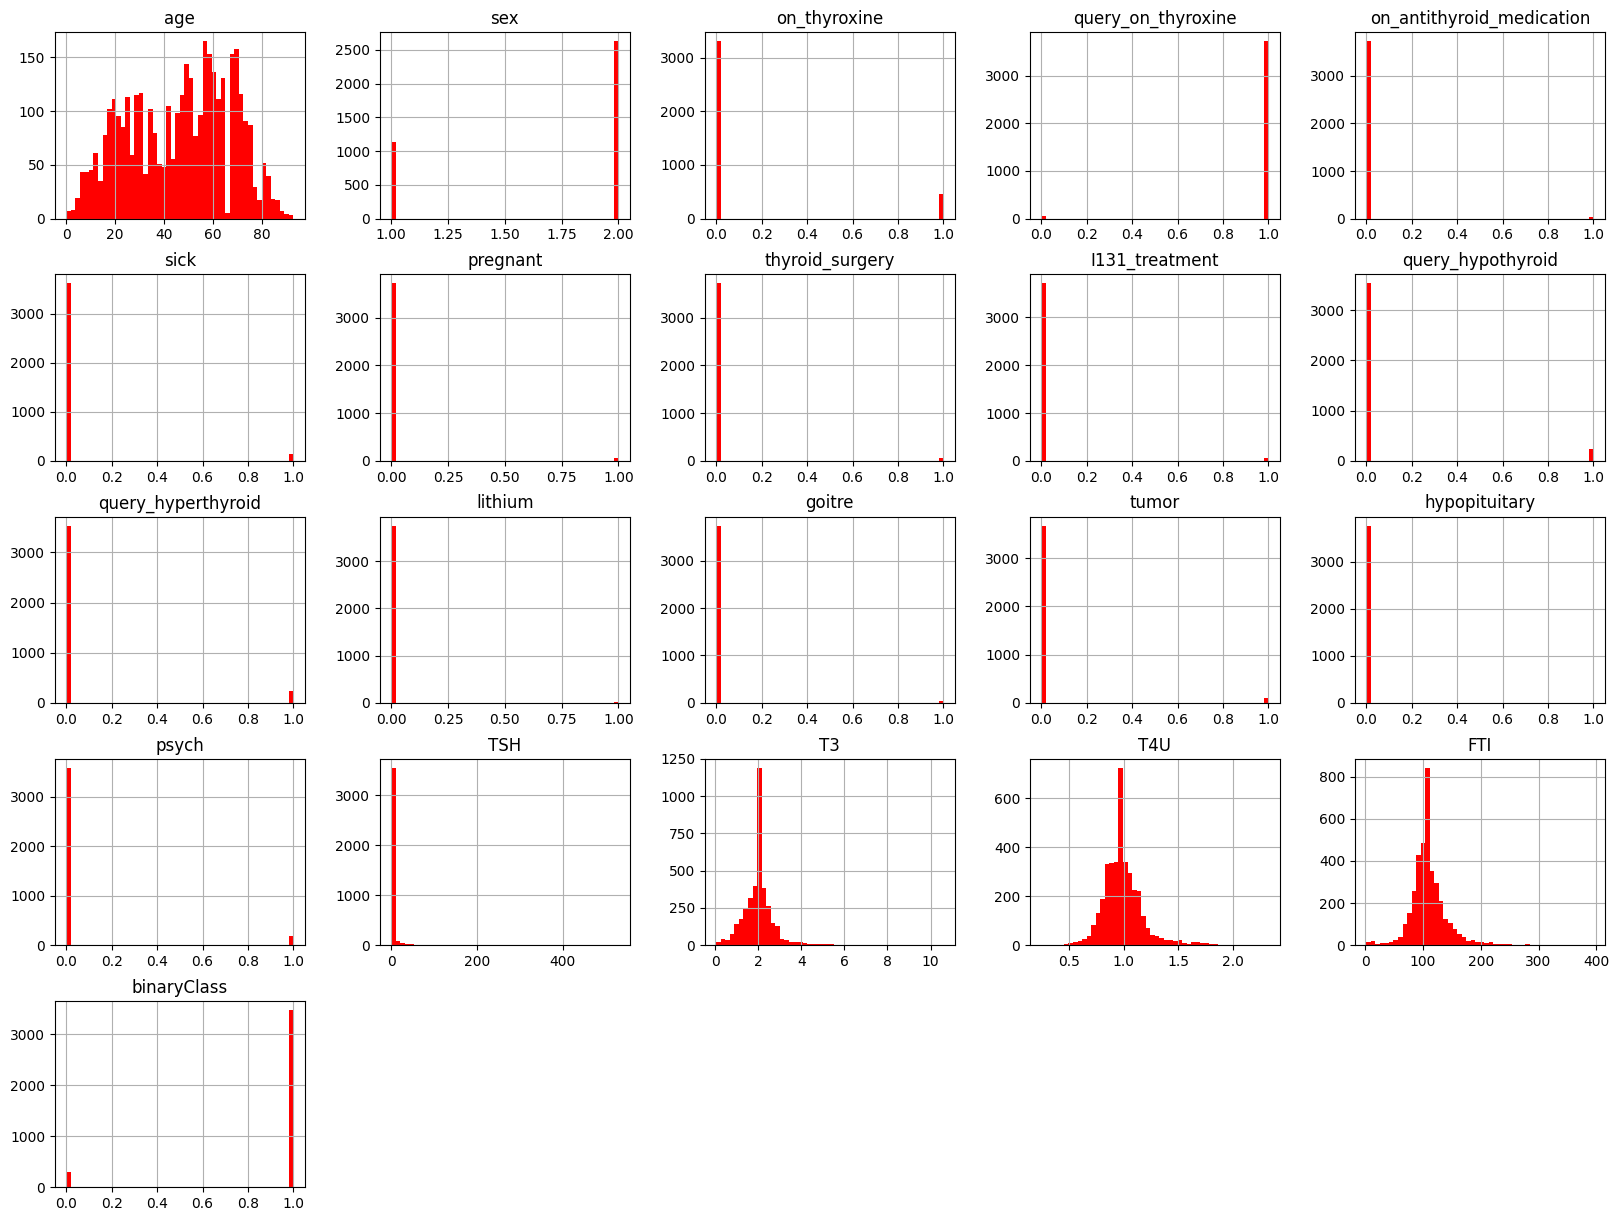

In [43]:
dataframe.hist(bins=50,figsize=(20,15),color = "red")

In [44]:
# threre is so much correlation
#now we can normalize the value
for i in df2.columns:
    print('\n\n')
    print(i)
    print(df2[i].unique())
    
    




age
['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' nan '93' '92']



sex
[2. 1.]



on_thyroxine
[0 1]



query_on_thyroxine
[1 0]



on_antithyroid_medication
[0 1]



sick
[0 1]



pregnant
[0 1]



thyroid_surgery
[0 1]



I131_treatment
[0 1]



query_hypothyroid
[0 1]



query_hyperthyroid
[0 1]



lithium
[0 1]



goitre
[0 1]



tumor
[0 1]



hypopituitary
[0 1]



psych
[0 1]



TSH
[1.30000000e+00 4.10000000e+00 9.80000000e-01 1.60000000e-01
 7.20000000e-01 3.00000000e-02 5.08676609e+00 2.20000000e+00
 6.00000000e-01 2.40000000e+00 1.10000000e+00 2.80000000e+00
 3.3000000

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [46]:
# x and y split
x = dataframe.drop('binaryClass',axis=1)
y = dataframe.binaryClass
df2 = x# for ongoing process without PCA

In [47]:
'''cols = ['age','sex','TSH','T3','T4U','FTI']
for i in cols:
    df2[i] = scaler.fit_transform(df2[[i]])'''

"cols = ['age','sex','TSH','T3','T4U','FTI']\nfor i in cols:\n    df2[i] = scaler.fit_transform(df2[[i]])"

In [48]:
x.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'T4U', 'FTI'],
      dtype='object')

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'on_thyroxine'}>,
        <Axes: title={'center': 'query_on_thyroxine'}>],
       [<Axes: title={'center': 'on_antithyroid_medication'}>,
        <Axes: title={'center': 'sick'}>,
        <Axes: title={'center': 'pregnant'}>,
        <Axes: title={'center': 'thyroid_surgery'}>],
       [<Axes: title={'center': 'I131_treatment'}>,
        <Axes: title={'center': 'query_hypothyroid'}>,
        <Axes: title={'center': 'query_hyperthyroid'}>,
        <Axes: title={'center': 'lithium'}>],
       [<Axes: title={'center': 'goitre'}>,
        <Axes: title={'center': 'tumor'}>,
        <Axes: title={'center': 'hypopituitary'}>,
        <Axes: title={'center': 'psych'}>],
       [<Axes: title={'center': 'TSH'}>, <Axes: title={'center': 'T3'}>,
        <Axes: title={'center': 'T4U'}>, <Axes: title={'center': 'FTI'}>]],
      dtype=object)

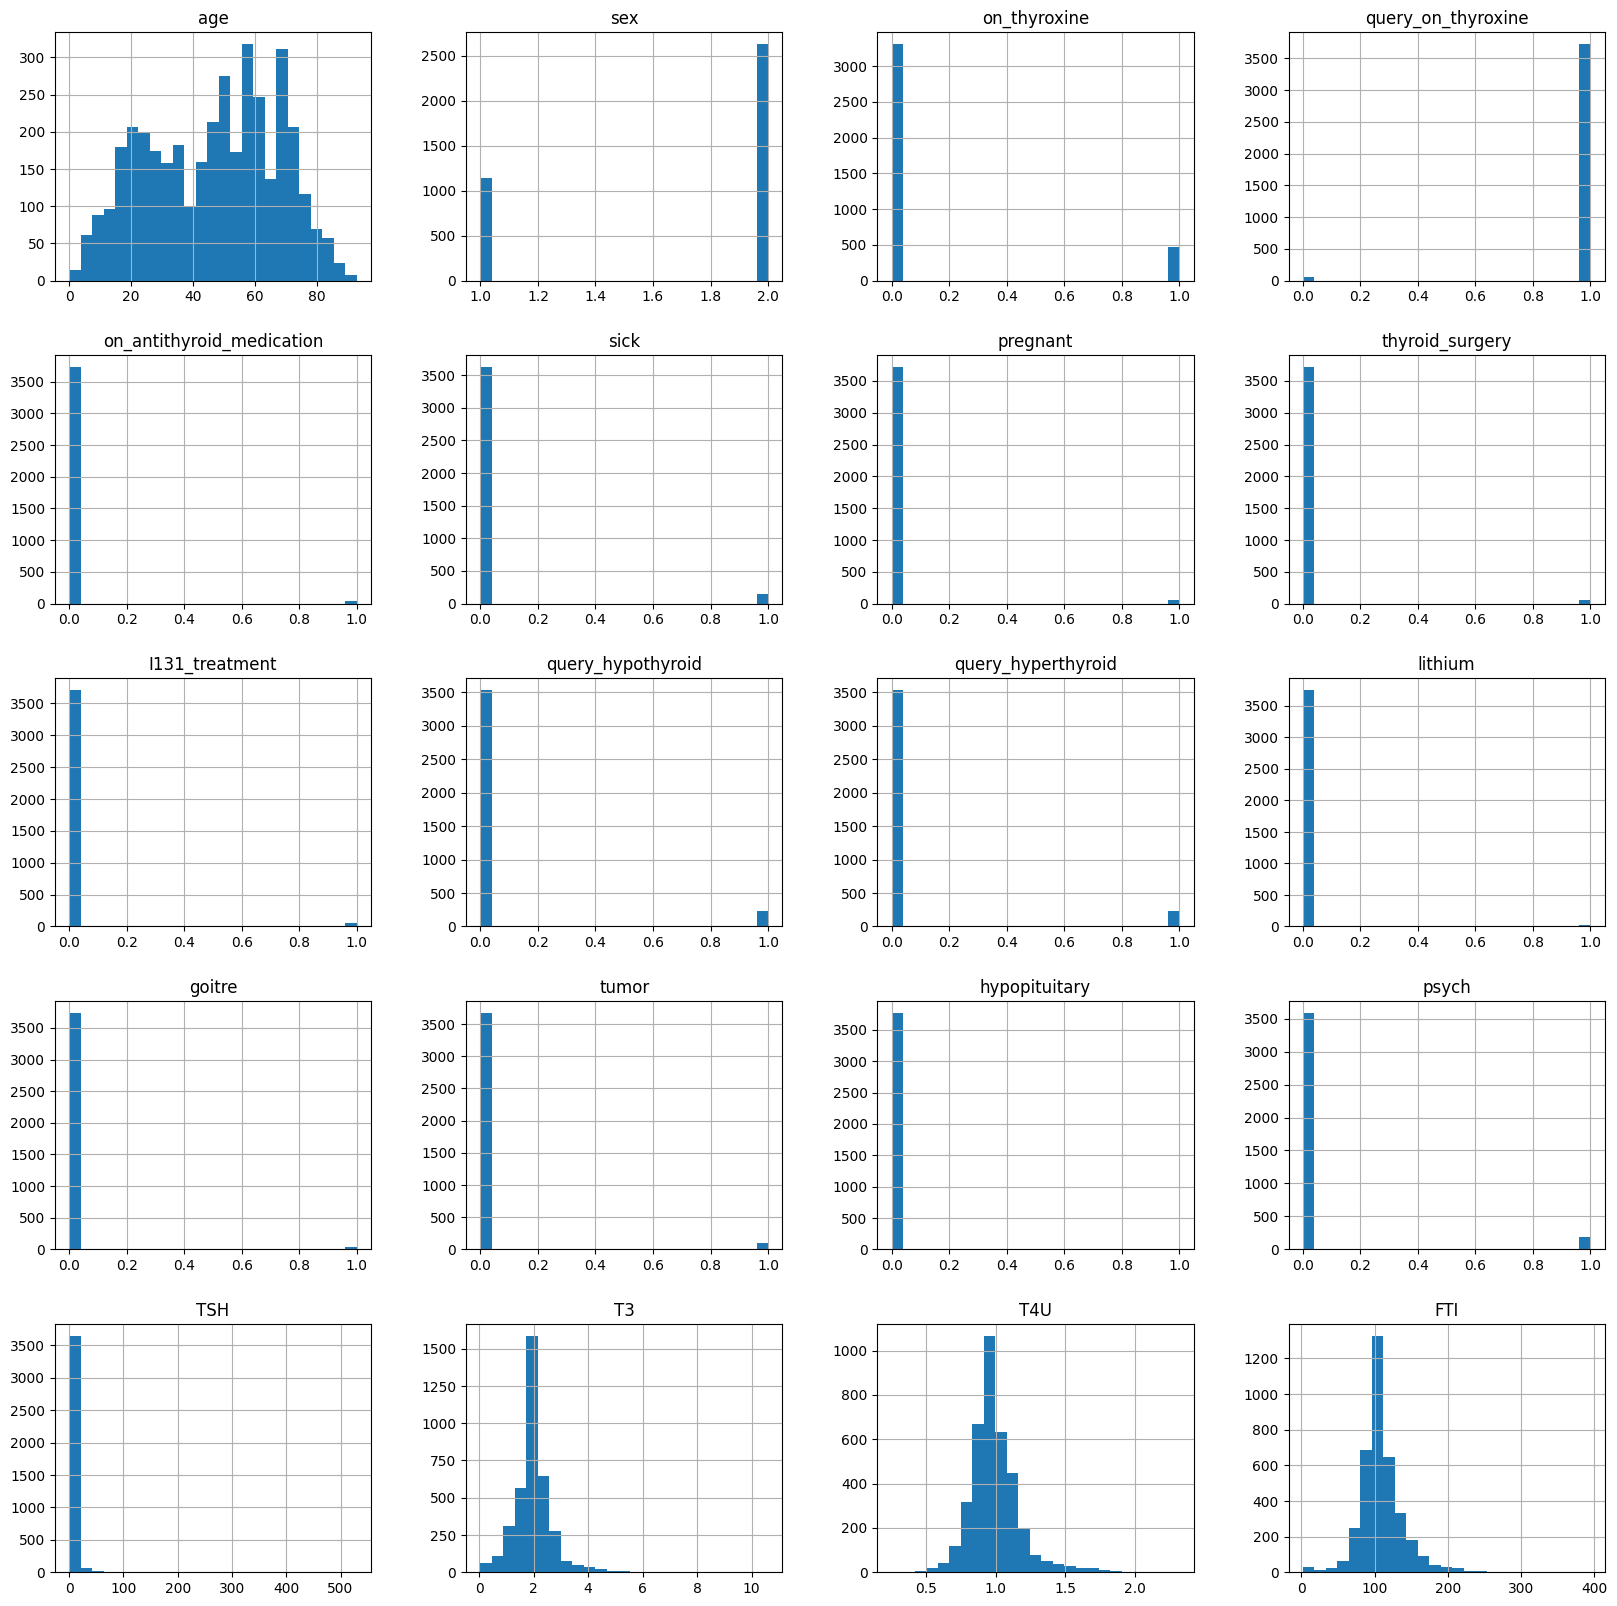

In [49]:
df2.hist(bins = 25, figsize = (20,20))

In [50]:
df3 = x[['age','TSH','T3','T4U','FTI']]
#df3 = x[['age','TT4','T3','T4U','FTI']]

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'TSH'}>],
       [<Axes: title={'center': 'T3'}>, <Axes: title={'center': 'T4U'}>],
       [<Axes: title={'center': 'FTI'}>, <Axes: >]], dtype=object)

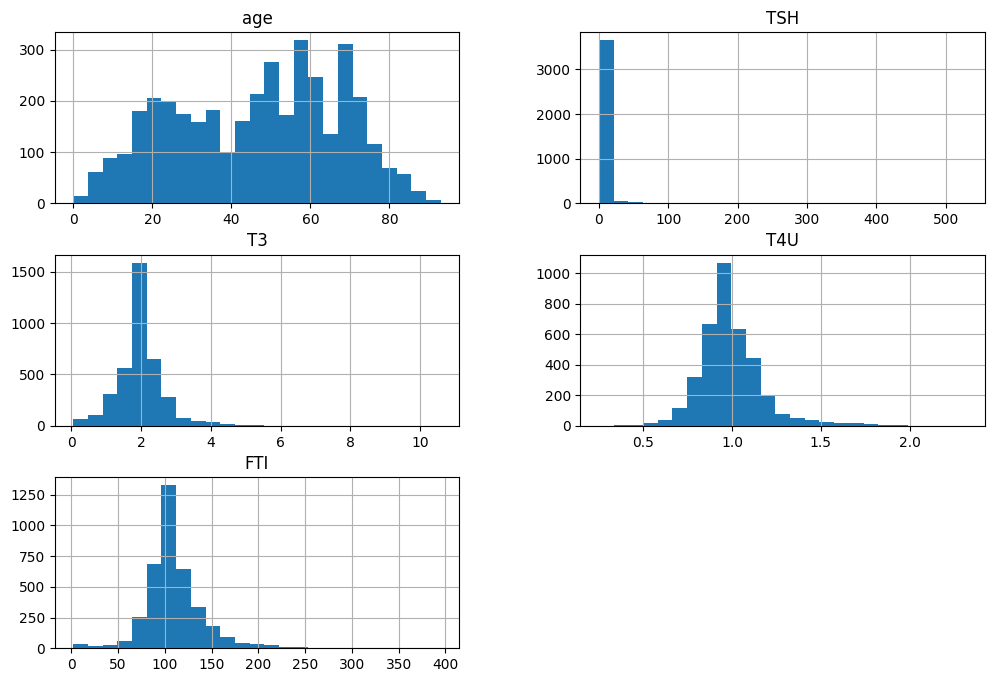

In [51]:
df3.hist(bins = 25,figsize = (12,8))

In [52]:
df2

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI
0,34,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.300000,2.5000,1.140,109.000000
1,15,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4.100000,2.0000,0.995,110.469649
2,40,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.980000,2.0135,0.910,120.000000
3,67,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.160000,1.9000,0.995,110.469649
4,67,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.720000,1.2000,0.870,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,22,2.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5.086766,2.0135,0.995,110.469649
3768,64,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,2.1000,1.080,114.000000
3769,71,2.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,5.100000,1.8000,1.070,105.000000
3770,69,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.700000,2.0000,0.940,87.000000


In [53]:
#df2.sex.replace({2:'Female',1:'Male'},inplace=True)
#df2.drop(['on thyroxine','query on thyroxine','on antithyroid medication','thyroid surgery','I131 treatment','query hypothyroid','query hyperthyroid'],axis=1,inplace=True)


In [54]:
from sklearn.model_selection import train_test_split #importing the train test split function from model selection of skelarn
X_train,X_test,y_train,y_test = train_test_split(df2,y,test_size=0.20,random_state=42) #dividing the dataset into training and testing dataset3#
 

In [55]:
len(X_train)

3017

In [56]:
len(X_test)

755

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
from sklearn.tree import DecisionTreeClassifier #importing the descision tree classifier from the sklearn tree 
tree = DecisionTreeClassifier(max_depth=3) #making an instance the descision tree with maxdepth = 3 as passing the input
clf = tree.fit(X_train,y_train) #here we are passing our training and the testing data to the tree and fitting it
treepredict = clf.predict(X_test) #predicting the value by passing the x_test datset to the tree 

In [59]:
accuracy_score(treepredict,y_test)# here we are printing the accuracy score of the prediction and the testing data

0.9960264900662251

In [60]:
# check the accuracy on the training set
print('training accuracy = '+str(clf.score(X_train, y_train)*100))
print('testing accuracy = '+str(clf.score(X_test, y_test)*100))

training accuracy = 99.53596287703016
testing accuracy = 99.60264900662251


In [61]:
treepredict = clf.predict([[22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.23,1.90,0.57,83.6]])

C:\Users\shelk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [62]:
treepredict

array([1])

In [63]:
dataframe.binaryClass.value_counts()

binaryClass
1    3481
0     291
Name: count, dtype: int64

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier(max_depth=3)
rclf = rf.fit(X_train,y_train)
rfpred = rclf.predict(X_test)
accuracy_score(rfpred,y_test)

0.952317880794702

In [65]:
rfpred = rclf.predict([[21,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,24,1.60,1.18,65]])

C:\Users\shelk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [66]:
rfpred

array([0])

In [67]:
treepredict = clf.predict([[21,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,24,1.60,1.18,65]])

C:\Users\shelk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [68]:
treepredict

array([0])

In [69]:
treepredict = clf.predict([[25,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,2,1.96,0.08,69.6]])

C:\Users\shelk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [70]:
treepredict

array([1])

In [71]:
from sklearn.svm import SVC
svm = SVC(kernel="sigmoid")
sclf = svm.fit(X_train,y_train)
y_pred = sclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.8913907284768212

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lrclf = lr.fit(X_train,y_train)
y_pred = lrclf.predict(X_test)
accuracy_score(y_pred,y_test)

0.9602649006622517

In [73]:
dataframe.binaryClass.value_counts()

binaryClass
1    3481
0     291
Name: count, dtype: int64

In [74]:
'''from sklearn.neighbors import KNeighborsClassifier #importing the k nearest classifier from the sklearn neighbors 
neigh = KNeighborsClassifier(n_neighbors=3) #making an instance the k nearest neighbors with neighbors = 3 as passing the input
knnclf = neigh.fit(X_train,y_train) #here we are passing our training and the testing data to the tree and fitting it
y_pred = knnclf.predict(X_test) #predicting the value by passing the x_test datset to the tree 
accuracy_score(y_pred,y_test)# here we are printing the accuracy score of the prediction and the testing data'''

'from sklearn.neighbors import KNeighborsClassifier #importing the k nearest classifier from the sklearn neighbors \nneigh = KNeighborsClassifier(n_neighbors=3) #making an instance the k nearest neighbors with neighbors = 3 as passing the input\nknnclf = neigh.fit(X_train,y_train) #here we are passing our training and the testing data to the tree and fitting it\ny_pred = knnclf.predict(X_test) #predicting the value by passing the x_test datset to the tree \naccuracy_score(y_pred,y_test)# here we are printing the accuracy score of the prediction and the testing data'

In [75]:
X_test.head(15)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI
270,18,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.100000,2.2000,1.000,95.000000
2071,18,2.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6.200000,2.0135,0.900,95.000000
3660,47,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.200000,2.3000,0.940,123.000000
3207,17,2.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2.000000,2.2000,1.520,81.000000
1675,21,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.840000,1.5000,0.740,135.000000
1200,3,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.020000,2.3000,0.800,190.000000
2421,17,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.810000,2.8000,1.320,81.000000
551,26,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5.086766,2.0135,0.995,110.469649
567,67,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.070000,0.9000,0.830,124.000000
3322,56,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.400000,1.7000,0.890,116.000000


In [76]:
y_test.head(15)

270     1
2071    0
3660    1
3207    1
1675    1
1200    1
2421    1
551     1
567     1
3322    1
3126    1
3213    1
2768    1
1289    0
205     1
Name: binaryClass, dtype: int32

In [77]:
treepredict = clf.predict([[25,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,123.0,0.09,1.05,69.6]])

C:\Users\shelk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [78]:
treepredict

array([0])

In [79]:
import pickle
pickle.dump(tree,open('trmodel.pkl','wb'))

In [80]:
X_test

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,T4U,FTI
270,18,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.10,2.2000,1.000,95.000000
2071,18,2.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,6.20,2.0135,0.900,95.000000
3660,47,1.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.20,2.3000,0.940,123.000000
3207,17,2.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2.00,2.2000,1.520,81.000000
1675,21,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.84,1.5000,0.740,135.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,21,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4.60,1.6000,1.120,87.000000
3376,20,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.40,1.9000,0.995,110.469649
2812,69,2.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1.10,2.0135,0.500,265.000000
3540,27,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1.90,1.8000,0.810,123.000000


In [81]:
y_test

270     1
2071    0
3660    1
3207    1
1675    1
       ..
1027    1
3376    1
2812    1
3540    1
543     1
Name: binaryClass, Length: 755, dtype: int32